In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
data = pd.read_csv('problem_2_train.csv')
data.head(3)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9


In [3]:
test_data = pd.read_csv('problem_2_test.csv')
data.head(3)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9


### Cleaning The Data

In [4]:
data.isnull().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

In [5]:
data.hubpincode.unique().shape

(21,)

In [6]:
data.hubid.unique().shape

(21,)

In [7]:
semi_data = pd.DataFrame(data, columns=['hubid','hubpincode'])
semi_data.drop_duplicates(inplace=True)
semi_data.shape

(21, 2)

This shows that for every hubpincode there is a unique hubid or we can say that hubpincode is already categoriesed in hubid

In [8]:
#drop hubpincode
data.drop('hubpincode', inplace=True, axis=1)

In [9]:
data.shape

(6250, 15)

### converting string to ordinals

In [10]:
# here 1 january, year1 = 1
import datetime as dt
data['memcreateddate'] = pd.to_datetime(data['memcreateddate'])
data['mobilepurchasedate'] = pd.to_datetime(data['mobilepurchasedate'])
data['claimintdate'] = pd.to_datetime(data['claimintdate'])
data['pickupStartdate'] = pd.to_datetime(data['pickupStartdate'])

In [11]:
data['memcreateddate']=data['memcreateddate'].map(dt.datetime.toordinal)
data['mobilepurchasedate']=data['mobilepurchasedate'].map(dt.datetime.toordinal)
data['claimintdate']=data['claimintdate'].map(dt.datetime.toordinal)
data['pickupStartdate']=data['pickupStartdate'].map(dt.datetime.toordinal)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 15 columns):
srno                   6250 non-null int64
mobmake                6250 non-null object
hubid                  6250 non-null int64
pickuppartnerid        6250 non-null int64
deliverypartnerid      6250 non-null int64
insuranceCompanyId     6250 non-null int64
custpincodecategory    6250 non-null object
claimtype              6250 non-null object
custpincode            6250 non-null int64
memcreateddate         6250 non-null int64
mobilepurchasedate     6250 non-null int64
claimintdate           6250 non-null int64
servicecntrid          6250 non-null int64
pickupStartdate        6250 non-null int64
tat_in_days            6250 non-null int64
dtypes: int64(12), object(3)
memory usage: 732.5+ KB


### Removal of values equal to 0

In [13]:
#checking if any value is 0
data.mobmake.unique()

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [14]:
data.pickuppartnerid.unique()

array([233, 201, 308,   0], dtype=int64)

In [15]:
data.deliverypartnerid.unique()

array([233, 245, 201,   0], dtype=int64)

In [16]:
data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [17]:
data.drop(data[data["pickuppartnerid"]==0].index,inplace=True)
data.drop(data[data["deliverypartnerid"]==0].index,inplace=True)
data.drop(data[data["custpincodecategory"]=='0'].index,inplace=True)

In [18]:
data.shape

(5963, 15)

### Finding Colinearity

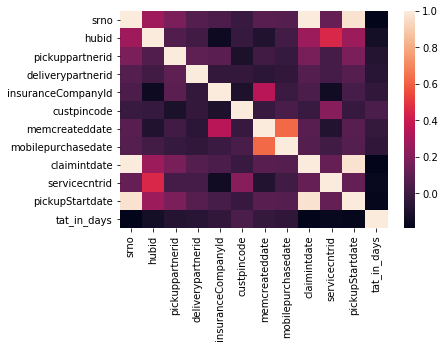

In [19]:
sns.heatmap(data.corr())

In [20]:
data.drop('srno', inplace=True, axis=1)

In [21]:
# checking if tat and pickupdate-claim is same
check_data = data[data['pickupStartdate']-data['claimintdate']== data['tat_in_days']]
check_data.shape

(153, 14)

In [22]:
data['pickupStar'] = data['pickupStartdate']-data['claimintdate']
data['mobilepurch'] = data['memcreateddate']-data['mobilepurchasedate']
data['claimint'] = data['claimintdate'] - data['memcreateddate']
data['purchi'] = data['claimintdate'] - data['mobilepurchasedate']
data.head(3)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,pickupStar,mobilepurch,claimint,purchi
0,AN,7,233,233,131,A,ADLD,500001,736446,736300,736733,4403,736738,5,5,146,287,433
1,AJ,10,233,233,131,A,ADLD,226022,736394,736393,736729,4444,736733,12,4,1,335,336
2,AJ,2,233,233,228,A,ADLD,110018,736726,736721,736728,4388,736737,9,9,5,2,7


In [23]:
# dropping date columns
data.drop('memcreateddate', inplace=True, axis=1)
data.drop('claimintdate', inplace=True, axis=1)
data.drop('pickupStartdate', inplace=True, axis=1)
data.drop('mobilepurchasedate', inplace=True, axis=1)

In [24]:
data.rename(columns={'pickupStar':'pickup_to_claim_days'},inplace=True)
data.rename(columns={'mobilepurch':'member_purchase_days'},inplace=True)
data.rename(columns={'claimint':'claim_mem_days'},inplace=True)
data.rename(columns={'purchi':'claim_to_mobpurchase_days'},inplace=True)

In [25]:
data.head(2)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days
0,AN,7,233,233,131,A,ADLD,500001,4403,5,5,146,287,433
1,AJ,10,233,233,131,A,ADLD,226022,4444,12,4,1,335,336


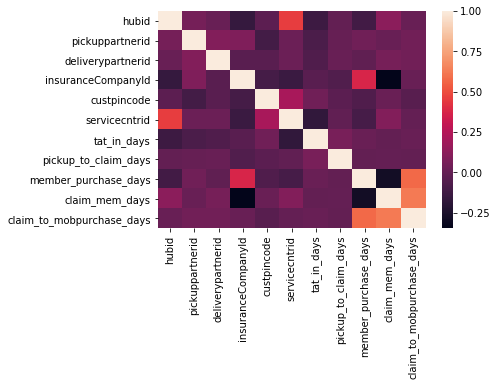

In [26]:
sns.heatmap(data.corr())

### Encoding Categorical Data

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [28]:
data.columns

Index(['mobmake', 'hubid', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincodecategory', 'claimtype', 'custpincode',
       'servicecntrid', 'tat_in_days', 'pickup_to_claim_days',
       'member_purchase_days', 'claim_mem_days', 'claim_to_mobpurchase_days'],
      dtype='object')

In [29]:
data.iloc[:, 0] = labelencoder_X.fit_transform(data.iloc[:, 0])

In [30]:
data.head(2)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days
0,12,7,233,233,131,A,ADLD,500001,4403,5,5,146,287,433
1,8,10,233,233,131,A,ADLD,226022,4444,12,4,1,335,336


In [31]:
data.custpincodecategory.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [32]:
custpincodecategory = pd.get_dummies(data['custpincodecategory'], prefix='custpincode')
claimtype = pd.get_dummies(data['claimtype'], prefix='claimtype')
custpincodecategory.head(3)

,custpincode_A,custpincode_B,custpincode_C,custpincode_D
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0


In [33]:
claimtype.head(3)

,claimtype_ADLD,claimtype_EW
0,1,0
1,1,0
2,1,0


In [34]:
custpincodecategory.drop('custpincode_D', inplace=True, axis=1)
claimtype.drop('claimtype_EW', inplace=True, axis=1)

data = pd.concat([data,custpincodecategory, claimtype], axis=1)
data.head(3)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days,custpincode_A,custpincode_B,custpincode_C,claimtype_ADLD
0,12,7,233,233,131,A,ADLD,500001,4403,5,5,146,287,433,1,0,0,1
1,8,10,233,233,131,A,ADLD,226022,4444,12,4,1,335,336,1,0,0,1
2,8,2,233,233,228,A,ADLD,110018,4388,9,9,5,2,7,1,0,0,1


In [35]:
data.drop('custpincodecategory', inplace=True, axis=1)
data.drop('claimtype', inplace=True, axis=1)

data.head(3)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days,custpincode_A,custpincode_B,custpincode_C,claimtype_ADLD
0,12,7,233,233,131,500001,4403,5,5,146,287,433,1,0,0,1
1,8,10,233,233,131,226022,4444,12,4,1,335,336,1,0,0,1
2,8,2,233,233,228,110018,4388,9,9,5,2,7,1,0,0,1


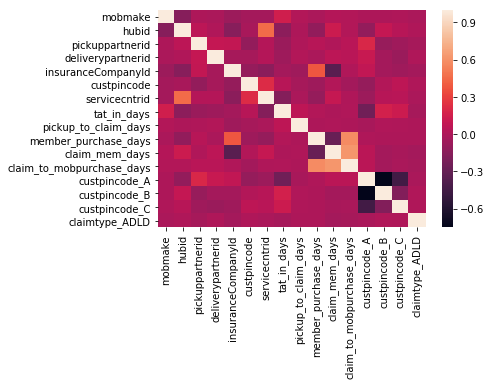

In [36]:
sns.heatmap(data.corr())

### Dividing the data into X and Y

In [37]:
data.columns

Index(['mobmake', 'hubid', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid', 'tat_in_days',
       'pickup_to_claim_days', 'member_purchase_days', 'claim_mem_days',
       'claim_to_mobpurchase_days', 'custpincode_A', 'custpincode_B',
       'custpincode_C', 'claimtype_ADLD'],
      dtype='object')

In [38]:
X = data[['mobmake', 'hubid', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid',
       'pickup_to_claim_days', 'member_purchase_days', 'claim_mem_days',
       'claim_to_mobpurchase_days', 'custpincode_A', 'custpincode_B',
       'custpincode_C', 'claimtype_ADLD']]

In [39]:
X.head(3)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days,custpincode_A,custpincode_B,custpincode_C,claimtype_ADLD
0,12,7,233,233,131,500001,4403,5,146,287,433,1,0,0,1
1,8,10,233,233,131,226022,4444,4,1,335,336,1,0,0,1
2,8,2,233,233,228,110018,4388,9,5,2,7,1,0,0,1


In [40]:
y = data['tat_in_days']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [42]:
### Applying linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [43]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_linreg = linreg.predict(X_test)

In [44]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)))

4.497203275346763


### processing the testing data

In [45]:
test_data.head(2)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08


In [46]:
test_data.drop('hubpincode', inplace=True, axis=1)

In [47]:
test_data['memcreateddate'] = pd.to_datetime(test_data['memcreateddate'])
test_data['mobilepurchasedate'] = pd.to_datetime(test_data['mobilepurchasedate'])
test_data['claimintdate'] = pd.to_datetime(test_data['claimintdate'])
test_data['pickupStartdate'] = pd.to_datetime(test_data['pickupStartdate'])

In [48]:
test_data['memcreateddate']=test_data['memcreateddate'].map(dt.datetime.toordinal)
test_data['mobilepurchasedate']=test_data['mobilepurchasedate'].map(dt.datetime.toordinal)
test_data['claimintdate']=test_data['claimintdate'].map(dt.datetime.toordinal)
test_data['pickupStartdate']=test_data['pickupStartdate'].map(dt.datetime.toordinal)

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 14 columns):
srno                   2116 non-null int64
mobmake                2116 non-null object
hubid                  2116 non-null int64
pickuppartnerid        2116 non-null int64
deliverypartnerid      2116 non-null int64
insuranceCompanyId     2116 non-null int64
custpincodecategory    2116 non-null object
claimtype              2116 non-null object
custpincode            2116 non-null int64
memcreateddate         2116 non-null int64
mobilepurchasedate     2116 non-null int64
claimintdate           2116 non-null int64
servicecntrid          2116 non-null int64
pickupStartdate        2116 non-null int64
dtypes: int64(11), object(3)
memory usage: 231.5+ KB


In [50]:
test_data.drop(test_data[test_data["pickuppartnerid"]==0].index,inplace=True)
test_data.drop(test_data[test_data["deliverypartnerid"]==0].index,inplace=True)
test_data.drop(test_data[test_data["custpincodecategory"]=='0'].index,inplace=True)

In [52]:
test_data.drop('srno', inplace=True, axis=1)

test_data['pickupStar'] = test_data['pickupStartdate']-test_data['claimintdate']
test_data['mobilepurch'] = test_data['memcreateddate']-test_data['mobilepurchasedate']
test_data['claimint'] = test_data['claimintdate'] - test_data['memcreateddate']
test_data['purchi'] = test_data['claimintdate'] - test_data['mobilepurchasedate']


test_data.drop('memcreateddate', inplace=True, axis=1)
test_data.drop('claimintdate', inplace=True, axis=1)
test_data.drop('pickupStartdate', inplace=True, axis=1)
test_data.drop('mobilepurchasedate', inplace=True, axis=1)

test_data.rename(columns={'pickupStar':'pickup_to_claim_days'},inplace=True)
test_data.rename(columns={'mobilepurch':'member_purchase_days'},inplace=True)
test_data.rename(columns={'claimint':'claim_mem_days'},inplace=True)
test_data.rename(columns={'purchi':'claim_to_mobpurchase_days'},inplace=True)

In [53]:
test_data.head(2)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days
0,AN,3,233,233,131,A,ADLD,560093,4467,5,3,186,189
1,AJ,2,233,233,228,A,ADLD,110034,4388,7,173,199,372


In [54]:
test_data.iloc[:, 0] = labelencoder_X.fit_transform(test_data.iloc[:, 0])

custpincodecategory = pd.get_dummies(test_data['custpincodecategory'], prefix='custpincode')
claimtype = pd.get_dummies(test_data['claimtype'], prefix='claimtype')

custpincodecategory.drop('custpincode_D', inplace=True, axis=1)
claimtype.drop('claimtype_EW', inplace=True, axis=1)

test_data = pd.concat([test_data,custpincodecategory, claimtype], axis=1)

test_data.drop('custpincodecategory', inplace=True, axis=1)
test_data.drop('claimtype', inplace=True, axis=1)

In [55]:
X_test_data = test_data[['mobmake', 'hubid', 'pickuppartnerid', 'deliverypartnerid',
       'insuranceCompanyId', 'custpincode', 'servicecntrid',
       'pickup_to_claim_days', 'member_purchase_days', 'claim_mem_days',
       'claim_to_mobpurchase_days', 'custpincode_A', 'custpincode_B',
       'custpincode_C', 'claimtype_ADLD']]

In [56]:
test_data.head(3)

,mobmake,hubid,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,pickup_to_claim_days,member_purchase_days,claim_mem_days,claim_to_mobpurchase_days,custpincode_A,custpincode_B,custpincode_C,claimtype_ADLD
0,13,3,233,233,131,560093,4467,5,3,186,189,1,0,0,1
1,10,2,233,233,228,110034,4388,7,173,199,372,1,0,0,1
2,10,3,233,233,228,590014,4460,7,1,40,41,0,0,1,1


In [57]:
linreg.fit(X, y)

y_pred_final = linreg.predict(X_test_data)

In [60]:
y_pred_final

array([12.21896358, 11.67828475, 14.54045138, ..., 11.65060414,
       10.7573519 , 12.0872577 ])

In [61]:
y_pred_final = y_pred_final.astype('int')

In [63]:
y_pred_final = pd.DataFrame(y_pred_final)

In [64]:
y_pred_final.to_csv('prob_2_sol.csv', index=False)